In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy.sql import func

In [29]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [31]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [32]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [33]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [34]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [35]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [36]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).first()
recent_date

('2017-08-23')

In [37]:
# all_records = session.query(measurement.date, measurement.station).all()
# for record in all_records:
#     print(record[1])

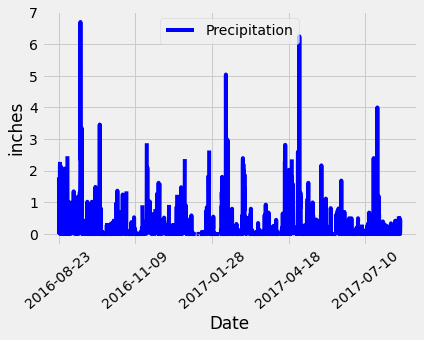

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
all_records = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previous_year).all()

# for record in all_records:
#     print(record[1])

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(all_records, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values(by=['Date'])
df

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(x = 'Date', y = 'Precipitation', rot = 40, color = 'blue')
plt.ylabel('inches')
plt.xlabel('Date')
plt.show()


In [39]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(measurement.station).distinct().count()

station_count


9

In [41]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_rows = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

station_rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
ave_temp = [func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
session.query(*ave_temp).filter(measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [43]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= previous_year).\
    order_by(measurement.date.desc()).all()
last_year_df = pd.DataFrame(last_year)   
last_year_df

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0
...,...
347,75.0
348,80.0
349,80.0
350,77.0


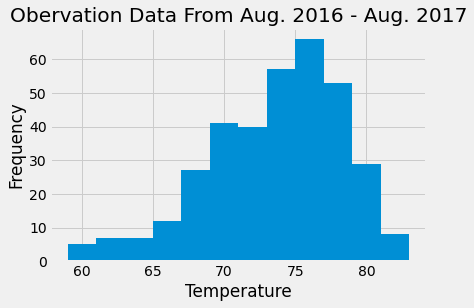

In [48]:
plt.hist(last_year_df['tobs'], bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Obervation Data From Aug. 2016 - Aug. 2017")
plt.show()

# Close session

In [45]:
# Close Session
session.close()